# Notebook purpose:

Previous project converted Synthesia <ins>mp4</ins> into musical composition

This project will aim to convert generic <ins>mp3</ins> into musical composition.

**Why?**

- 1) mp3 files are generally more accessible & available.
- 2) mp4 files are bulky and video quality impacts the performance of the script
- 3) Synthesia videos can have different colors for LH and RH (Default Green and Blue respectively)





Load Libraries

In [6]:
import librosa #https://github.com/deezer/spleeter/issues/419 to fix `numba.decorators` error
import librosa.display
import numpy as np
import audioread
import matplotlib.pyplot as plt

Librosa Documentation (Music Analysis Package):
http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html

Librosa Tutorial: <br>
https://github.com/librosa/tutorial/blob/master/Librosa%20tutorial.ipynb

External Tutorials: <br>
https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb

Abjad Documentation (Music Composition Package): <br>
http://abjad.mbrsi.org/

# Notebook purpose

This notebook is to expand/improve on the previous project of mine which originally used Synthesia mp4 <ins>video</ins> analysis to generate musical sheets.

The previous project ran on:
> OpenCV2 = Video analysis <br>
> Mingus = Python package to generate Lilypond (.ly) files <br>
> Lilypond = Music Composition software

However the goal will be to move away from video analysis and into audio analysis. In doing so, I hope to create a more general purpose script that can be executed on an array of instrumental music.

This would be better than my previous project because video files suffer in file size & the image analysis is only as good as the video quality. For audio files, they tend to be smaller such that recording at higher quality does not impact the size to a significant degree --- leading to more files generated with high quality.

Additionally, audio files are more readily obtainable and thus can be applied more generally to any application.

## This notebook

Aim:
> To generate musical sheets from <ins>audio</ins> mp3 files

Materials & Resources:
> Librosa = Audio analysis <br>
> Abjad = Music Composition python package

# Data Load & Cleaning

In [3]:
#Read musical data & obtain sample rate
data, sr = librosa.load('Above the Treetops - Lith Harbor by LEEGLE.mp3')
songname = "Above the Treetops - Lith Harbor"
print("Data shape: ",data.shape)
print("Sample Rate: ",sr)

`data` is a numpy array object which contains the audio data while `sr` is the sample rate (default 22050 Hz)

## Removal of initial silence

Text(0.5, 1.0, '')

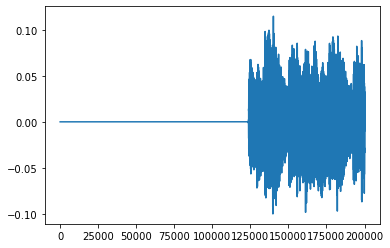

In [49]:
plt.plot(data[:200000])
plt.title("")

Song begins with no sound --> Create function to eliminate starting slience

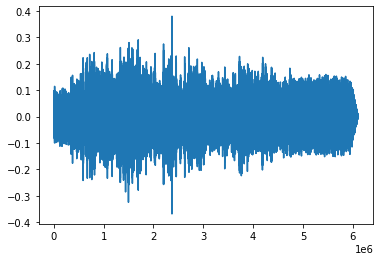

In [89]:
def eliminate_opening_silence(idx_threshold):
    zeros = np.where(data==0)
    a = zeros[0][zeros[0]<=idx_threshold]
    plt.plot(data[a[-1]:])
    return data[a[-1]:]
    
data = eliminate_opening_silence(200000)

# Data Exploration

## Mel-Scale

Notes are spaced in the frequency domain such that A5 = 2*A4

Ex: If A4 = 440Hz then A5 = 880Hz

This however is not very visually representative on a y-axis ---- introducing the Melody (Mel) scale.

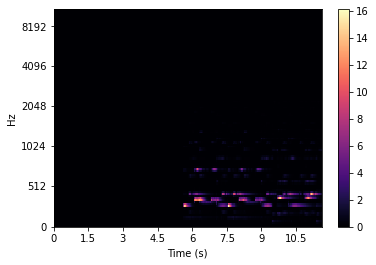

In [23]:
#spec is truncated to the first 500 entries because expanding to larger time-frame makes the window basically black
spec = librosa.feature.melspectrogram(y=data, sr=sr)
librosa.display.specshow(spec[:,:500],y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

## Spectogram analysis

In [4]:
data_h, data_p = librosa.effects.hpss(data)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

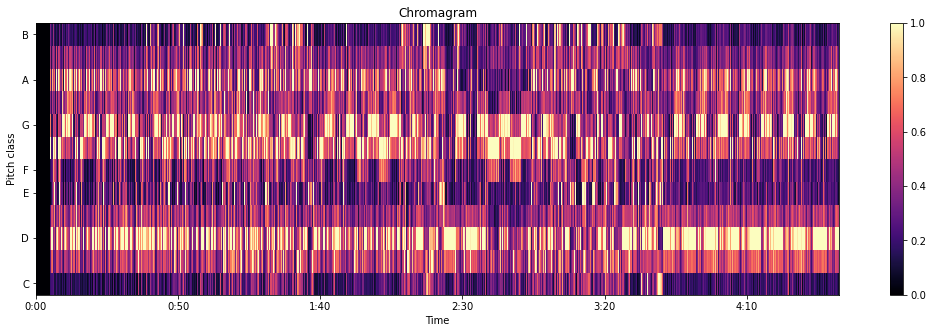

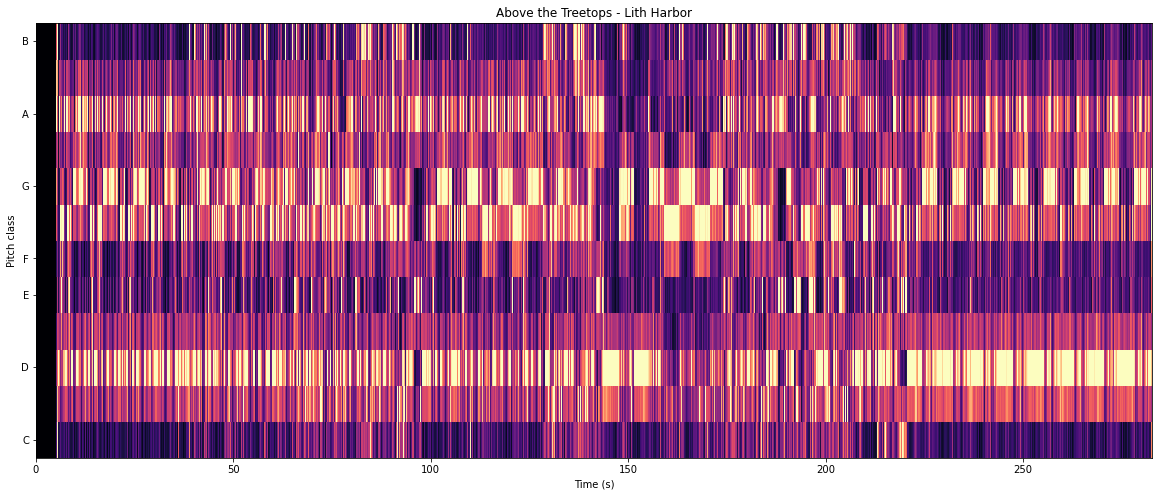

In [33]:
chroma = librosa.feature.chroma_cqt(y=data, sr=sr)
plt.figure(figsize=(18,5))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.figure(figsize=(20,8))
plt.title(songname)
librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma', );

# Troubleshooting Librosa issues

## `numba.decorators` error when running `import librosa`
source: https://github.com/deezer/spleeter/issues/419

Details:
- Navigate to your Anaconda envrionment
- 